In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
from scipy import sparse

train = sparse.load_npz("train.npz")

In [ ]:
train.shape

(14590, 77888)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from scipy.sparse import csr_matrix

# Предположим, что sparse_matrix — это ваша разреженная матрица.
# Пример создания разреженной матрицы:
# sparse_matrix = csr_matrix((3, 3), dtype=np.float64)
# sparse_matrix[0, 0] = 0.5
# sparse_matrix[1, 2] = 0.7

# Преобразование в COO для удобного доступа к ненулевым элементам
coo_matrix = train.tocoo()

# Извлечение ненулевых значений
nonzero_values = coo_matrix.data

# Создание и обучение scaler'а только на ненулевых значениях
scaler = MinMaxScaler()
nonzero_values_scaled = scaler.fit_transform(nonzero_values.reshape(-1, 1)).flatten()

# Применение масштабированных значений обратно к ненулевым элементам
for i, (row, col) in enumerate(zip(coo_matrix.row, coo_matrix.col)):
    train[row, col] = nonzero_values_scaled[i]

# Теперь sparse_matrix содержит масштабированные ненулевые значения.

In [ ]:
len(train.data)

2026769

In [ ]:
from scipy.sparse import coo_matrix

# Предположим, что sparse_matrix — ваша разреженная матрица в формате CSR, CSC или любом другом.
# Преобразуем её в COO для удобного доступа к элементам.
coo_matrix = train.tocoo()

# Используем условие для фильтрации ненулевых элементов, которые нужно обнулить.
# Создаем маску для значений, которые больше 0.25.
mask = coo_matrix.data > 0.22

# Применяем маску и обнуляем эти значения.
coo_matrix.data[mask] = 0

# Преобразуем обратно в исходный формат, если это необходимо. Здесь возвращаем в CSR.
train = coo_matrix.tocsr()

# Теперь в sparse_matrix все значения больше 0.25 заменены на 0.

train.eliminate_zeros()

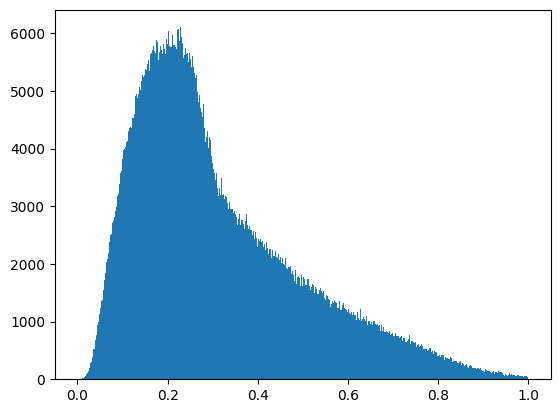

In [ ]:
plt.hist(train.data, bins=1000)

plt.show()

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler(with_centering=False)
scaler.fit(train)

RobustScaler(with_centering=False)

In [ ]:
scaled_data = scaler.transform(train)

In [ ]:
max(scaled_data.data)

15.132602403511896

In [ ]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(random_state=42, output_distribution='normal')
normal_train = qt.fit_transform(train)

In [ ]:
from sklearn.preprocessing import

scaler = RobustScaler(with_centering=False)
scaler.fit(train)

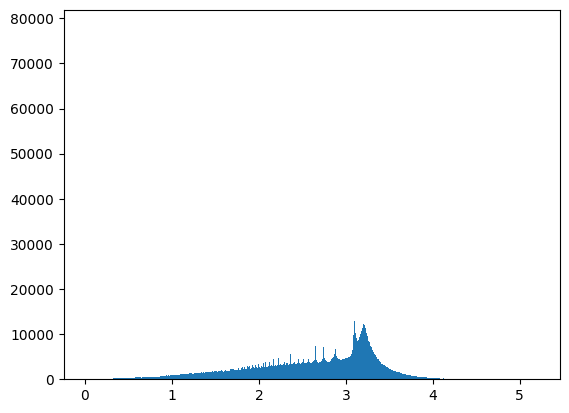

In [ ]:
plt.hist(normal_train.data, bins=1000)

plt.show()

In [ ]:
plt.subplots(1, 2)
plt.hist(data, bins=100)

plt.subplots(2, 2)
plt.hist()

Первой идеей было попробовать KMeans и посмотреть, что он нам даст
Сначала был перебор от 2 до 20 кластеров, расстояние до центроид при этом не особо уменьшалось, поэтому решила попробовать на 100 кластерах. Но даже это не дало особых результатов. Сделала вывод, что кластеров очень много, искать их KMeans будет слишком долго
/ниже только часть моих опытов, остальное удалила, чтобы не засорять/

In [ ]:
kmeans_rand = KMeans(n_clusters=100, random_state=42)
kmeans_rand.fit(train)
print(np.sqrt(kmeans_rand.inertia_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


118.57029163572686


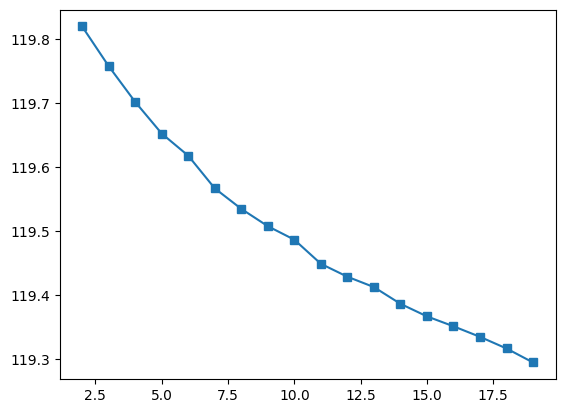

In [ ]:
plt.plot(range(2, 20), np.sqrt(dist_rand), marker='s')

plt.show()

DBSCAN и другие методы работали очень долго, вспомнила про SpectralClustering

Это был первый метод, который дал скор > simple

In [ ]:
pip install pyamg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.3 MB/s eta 0:00:00


In [ ]:
import pyamg

In [ ]:

from sklearn.cluster import SpectralClustering

In [ ]:
%%time
from sklearn.cluster import SpectralClustering

labels = SpectralClustering(n_clusters=3, random_state=42,
                            assign_labels="discretize", n_jobs=-1,
                            eigen_solver='amg').fit_predict(train)

In [ ]:
df = pd.DataFrame(data={'ID': range(train.shape[0]), 'TARGET': labels})

In [ ]:
df['TARGET'].value_counts()

TARGET
1    6909
0    3946
2    3735
Name: count, dtype: int64

In [ ]:
df.to_csv('ans_robust22.csv', index=False)